<a href="https://colab.research.google.com/github/Kasemsan054/LabCSD2301/blob/master/rice_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **งานวิจัย เรื่อง การพยากรณ์ผลผลิตข้าวนาปรังจากปริมาณน้ำฝน**

รายชื่อผู้ทำงานวิจัย
1. 64122250033 นาย ศิรา จิตใจฉ่ำ
2. 64122250054 นาย เกษมสันต์ ชัยรัตน์
3. 64122250057 นางสาว ธัญญวรรณ ส่งเสริม

Datasets => [CLICK ME](https://github.com/Kasemsan054/LabCSD2301)

# นำเข้าไลบรารี่

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import folium
import geopandas as gpd
import random
%matplotlib inline

# ข้อมูล

## ข้อมูลปริมาณการผลิตข้าวนาปรัง

### ผลผลิตข้าวนาปรัง ปี 2564

In [35]:
rice_2564 = pd.read_csv('https://raw.githubusercontent.com/Kasemsan054/LabCSD2301/master/datasets/%E0%B8%AA%E0%B8%B3%E0%B8%99%E0%B8%B1%E0%B8%81%E0%B8%87%E0%B8%B2%E0%B8%99%E0%B9%80%E0%B8%A8%E0%B8%A3%E0%B8%A9%E0%B8%90%E0%B8%81%E0%B8%B4%E0%B8%88%E0%B8%81%E0%B8%B2%E0%B8%A3%E0%B9%80%E0%B8%81%E0%B8%A9%E0%B8%95%E0%B8%A3%20%20%E0%B8%AA%E0%B8%B4%E0%B8%99%E0%B8%84%E0%B9%89%E0%B8%B2%E0%B9%80%E0%B8%81%E0%B8%A9%E0%B8%95%E0%B8%A3%E0%B8%82%E0%B9%89%E0%B8%B2%E0%B8%A7%E0%B8%99%E0%B8%B2%E0%B8%9B%E0%B8%A3%E0%B8%B1%E0%B8%87%202564.csv')
rice_2564.head()

,จังหวัด,ผลผลิต(ตัน),สัดส่วน,เนื้อที่เก็บเกี่ยว(ไร่),ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.)
0,สุพรรณบุรี,"603,384",10%,"820,261",735.60
1,อยุธยา,"461,714",7%,"647,718",712.83
2,นครสวรรค์,"346,383",6%,"521,396",664.34
3,พิจิตร,"307,387",5%,"469,754",654.36
4,พิษณุโลก,"278,354",5%,"454,696",612.18


### ผลผลิตข้าวนาปรัง ปี 2565

In [36]:
rice_2565 = pd.read_csv('https://raw.githubusercontent.com/Kasemsan054/LabCSD2301/master/datasets/%E0%B8%AA%E0%B8%B3%E0%B8%99%E0%B8%B1%E0%B8%81%E0%B8%87%E0%B8%B2%E0%B8%99%E0%B9%80%E0%B8%A8%E0%B8%A3%E0%B8%A9%E0%B8%90%E0%B8%81%E0%B8%B4%E0%B8%88%E0%B8%81%E0%B8%B2%E0%B8%A3%E0%B9%80%E0%B8%81%E0%B8%A9%E0%B8%95%E0%B8%A3%20%20%E0%B8%AA%E0%B8%B4%E0%B8%99%E0%B8%84%E0%B9%89%E0%B8%B2%E0%B9%80%E0%B8%81%E0%B8%A9%E0%B8%95%E0%B8%A3%E0%B8%82%E0%B9%89%E0%B8%B2%E0%B8%A7%E0%B8%99%E0%B8%B2%E0%B8%9B%E0%B8%A3%E0%B8%B1%E0%B8%87%202565.csv')
rice_2565.head()

,จังหวัด,ผลผลิต(ตัน),สัดส่วน,เนื้อที่เก็บเกี่ยว(ไร่),ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.)
0,สุพรรณบุรี,"529,854",10%,"723,071",732.78
1,อยุธยา,"377,129",7%,"532,981",707.58
2,พิจิตร,"316,003",6%,"495,427",637.84
3,พิษณุโลก,"311,253",6%,"524,171",593.80
4,นครสวรรค์,"233,886",4%,"351,734",664.95


## ข้อมูลปริมาณน้ำฝนประเทศไทย ในแต่ละจังหวัด

In [37]:
rain = pd.read_csv('https://raw.githubusercontent.com/Kasemsan054/LabCSD2301/master/datasets/%E0%B8%8A%E0%B8%B8%E0%B8%94%E0%B8%82%E0%B9%89%E0%B8%AD%E0%B8%A1%E0%B8%B9%E0%B8%A5%E0%B8%9B%E0%B8%A3%E0%B8%B4%E0%B8%A1%E0%B8%B2%E0%B8%93%E0%B8%99%E0%B9%89%E0%B8%B3%E0%B8%9D%E0%B8%99%E0%B8%9B%E0%B8%A3%E0%B8%B0%E0%B9%80%E0%B8%97%E0%B8%A8%E0%B9%84%E0%B8%97%E0%B8%A2.csv')
rain.head()

,ProvinceID,ProvinceName,ProvinceName 2,MinRain,MaxRain,AvgRain,region,Year,Month,Date,Month_TH
0,10,กรุงเทพมหานคร,Bangkok,54.299999,257.230011,142.119137,กลาง,2018,1,1/1/18,มกราคม
1,11,สมุทรปราการ,Samut Prakan,76.250000,256.100006,137.302046,กลาง,2018,1,1/1/18,มกราคม
2,12,นนทบุรี,Nonthaburi,38.360001,161.470001,113.433771,กลาง,2018,1,1/1/18,มกราคม
3,13,ปทุมธานี,Pathum Thani,51.439999,116.500000,82.901688,กลาง,2018,1,1/1/18,มกราคม
4,14,พระนครศรีอยุธยา,Phra Nakhon Si Ayutthaya,8.850000,88.589996,39.960089,กลาง,2018,1,1/1/18,มกราคม


# การกรองข้อมูล

## ชุดข้อมูลการผลิตข้าวนาปรัง

### ตรวจหาความผิดปกติของข้อมูลเบื้องต้น

In [38]:
rice_2564.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   จังหวัด                           71 non-null     object 
 1   ผลผลิต(ตัน)                       71 non-null     object 
 2   สัดส่วน                           71 non-null     object 
 3   เนื้อที่เก็บเกี่ยว(ไร่)           71 non-null     object 
 4   ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.)  71 non-null     float64
dtypes: float64(1), object(4)
memory usage: 2.9+ KB


In [39]:
rice_2565.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   จังหวัด                           72 non-null     object 
 1   ผลผลิต(ตัน)                       72 non-null     object 
 2   สัดส่วน                           72 non-null     object 
 3   เนื้อที่เก็บเกี่ยว(ไร่)           72 non-null     object 
 4   ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.)  72 non-null     float64
dtypes: float64(1), object(4)
memory usage: 2.9+ KB


### นำข้อมูลมารวมกันเป็นข้อมูลชุดเดียวกัน

In [40]:
rices = pd.concat([rice_2564, rice_2565], ignore_index=True)
rices

,จังหวัด,ผลผลิต(ตัน),สัดส่วน,เนื้อที่เก็บเกี่ยว(ไร่),ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.)
0,สุพรรณบุรี,"603,384",10%,"820,261",735.60
1,อยุธยา,"461,714",7%,"647,718",712.83
2,นครสวรรค์,"346,383",6%,"521,396",664.34
3,พิจิตร,"307,387",5%,"469,754",654.36
4,พิษณุโลก,"278,354",5%,"454,696",612.18
...,...,...,...,...,...
138,ชุมพร,351,0%,711,493.67
139,แม่ฮ่องสอน,83,0%,149,557.05
140,กระบี่,43,0%,97,443.30
141,ตรัง,12,0%,30,400.00


### เปลี่ยนชื่อคอลัมน์ใหม่

In [41]:
rices.columns

Index(['จังหวัด', 'ผลผลิต(ตัน)', 'สัดส่วน', 'เนื้อที่เก็บเกี่ยว(ไร่)',
       'ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.)'],
      dtype='object')

In [42]:
rices.rename(columns = {'จังหวัด' : 'ProvinceName', 'ผลผลิต(ตัน)' : 'Prod', 'สัดส่วน' : 'Prop', 'เนื้อที่เก็บเกี่ยว(ไร่)' : 'HarvArea',
       'ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.)' : 'ProdPerHarvArea'}, inplace = True)
rices

,ProvinceName,Prod,Prop,HarvArea,ProdPerHarvArea
0,สุพรรณบุรี,"603,384",10%,"820,261",735.60
1,อยุธยา,"461,714",7%,"647,718",712.83
2,นครสวรรค์,"346,383",6%,"521,396",664.34
3,พิจิตร,"307,387",5%,"469,754",654.36
4,พิษณุโลก,"278,354",5%,"454,696",612.18
...,...,...,...,...,...
138,ชุมพร,351,0%,711,493.67
139,แม่ฮ่องสอน,83,0%,149,557.05
140,กระบี่,43,0%,97,443.30
141,ตรัง,12,0%,30,400.00


### แปลงข้อมูล จาก object เป็น numerical

In [43]:
# กำจัดเครื่องหมาย (,) และเปลี่ยนชนิดข้อมูลให้เป็น float
rices['Prod'] = rices['Prod'].str.replace(',', '').astype(float)
rices['HarvArea'] = rices['HarvArea'].str.replace(',', '').astype(float)

In [44]:
rices.dtypes

ProvinceName        object
Prod               float64
Prop                object
HarvArea           float64
ProdPerHarvArea    float64
dtype: object

In [45]:
rices

,ProvinceName,Prod,Prop,HarvArea,ProdPerHarvArea
0,สุพรรณบุรี,603384.0,10%,820261.0,735.60
1,อยุธยา,461714.0,7%,647718.0,712.83
2,นครสวรรค์,346383.0,6%,521396.0,664.34
3,พิจิตร,307387.0,5%,469754.0,654.36
4,พิษณุโลก,278354.0,5%,454696.0,612.18
...,...,...,...,...,...
138,ชุมพร,351.0,0%,711.0,493.67
139,แม่ฮ่องสอน,83.0,0%,149.0,557.05
140,กระบี่,43.0,0%,97.0,443.30
141,ตรัง,12.0,0%,30.0,400.00


### ลบแถวข้อมูลที่ผิดปกติเกินเหตุ (Over Outlier)

In [46]:
rices = rices[(rices['Prod'] > 10000) & (rices['Prod'] < 100000)]
rices

,ProvinceName,Prod,Prop,HarvArea,ProdPerHarvArea
23,อ่างทอง,99868.0,2%,154160.0,647.82
24,สระบุรี,95702.0,2%,146284.0,654.22
25,ขอนแก่น,79951.0,1%,138243.0,578.34
26,อุบลราชธานี,79618.0,1%,165902.0,479.91
27,ปราจีนบุรี,77814.0,1%,124479.0,625.12
...,...,...,...,...,...
116,พัทลุง,15056.0,0%,28049.0,536.77
117,หนองบัวลำภู,13649.0,0%,27119.0,503.30
118,สุรินทร์,13601.0,0%,29301.0,464.18
119,ปัตตานี,12268.0,0%,20245.0,605.98


## ข้อมูลปริมาณน้ำฝน

### ตรวจหาความผิดปกติของข้อมูลเบื้องต้น

In [47]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4235 entries, 0 to 4234
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ProvinceID      4235 non-null   int64  
 1   ProvinceName    4235 non-null   object 
 2   ProvinceName 2  4235 non-null   object 
 3   MinRain         4235 non-null   float64
 4   MaxRain         4235 non-null   float64
 5   AvgRain         4235 non-null   float64
 6   region          4235 non-null   object 
 7   Year            4235 non-null   int64  
 8   Month           4235 non-null   int64  
 9   Date            4235 non-null   object 
 10  Month_TH        4235 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 364.1+ KB


### เลือกข้อมูลปริมาณน้ำฝนช่วงปี 2021 - 2022

In [48]:
# ตัดชุดข้อมูล เอาข้อมูลตั้งแต่มี ค.ศ.2019 - 2021
rain_2021to2022 = rain[(rain['Year'] >= 2021) & (rain['Year'] <= 2022)]
rain_2021to2022

,ProvinceID,ProvinceName,ProvinceName 2,MinRain,MaxRain,AvgRain,region,Year,Month,Date,Month_TH
2772,10,กรุงเทพมหานคร,Bangkok,0.000000,0.000000,0.000000,กลาง,2021,1,1/1/21,มกราคม
2773,11,สมุทรปราการ,Samut Prakan,0.000000,0.000000,0.000000,กลาง,2021,1,1/1/21,มกราคม
2774,12,นนทบุรี,Nonthaburi,0.000000,0.000000,0.000000,กลาง,2021,1,1/1/21,มกราคม
2775,13,ปทุมธานี,Pathum Thani,0.000000,0.000000,0.000000,กลาง,2021,1,1/1/21,มกราคม
2776,14,พระนครศรีอยุธยา,Phra Nakhon Si Ayutthaya,0.000000,0.000000,0.000000,กลาง,2021,1,1/1/21,มกราคม
...,...,...,...,...,...,...,...,...,...,...,...
4230,92,ตรัง,Trang,158.050003,433.649994,293.423136,ใต้,2022,7,1/7/22,กรกฎาคม
4231,93,พัทลุง,Phatthalung,101.309998,264.140015,144.777569,ใต้,2022,7,1/7/22,กรกฎาคม
4232,94,ปัตตานี,Pattani,127.589996,214.440002,172.280939,ใต้,2022,7,1/7/22,กรกฎาคม
4233,95,ยะลา,Yala,122.440002,189.169998,148.495964,ใต้,2022,7,1/7/22,กรกฎาคม


### รวมกลุ่มข้อมูลปริมาณน้ำฝนจากรายเดือนเป็นรายปี ตาม ปี, รหัสจังหวัด, ชื่อจังหวัด และ ภูมิภาค และหาผลรวมของค่าเฉลี่ยน้ำฝน

In [49]:
grouped_rain = rain_2021to2022.groupby(['Year','ProvinceID','ProvinceName','region'])['AvgRain'].sum().reset_index()
grouped_rain['AvgRain'] = grouped_rain['AvgRain'] / 12
grouped_rain

,Year,ProvinceID,ProvinceName,region,AvgRain
0,2021,10,กรุงเทพมหานคร,กลาง,123.985676
1,2021,11,สมุทรปราการ,กลาง,136.733381
2,2021,12,นนทบุรี,กลาง,113.027516
3,2021,13,ปทุมธานี,กลาง,112.869163
4,2021,14,พระนครศรีอยุธยา,กลาง,100.002572
...,...,...,...,...,...
149,2022,92,ตรัง,ใต้,115.191427
150,2022,93,พัทลุง,ใต้,114.451084
151,2022,94,ปัตตานี,ใต้,98.544058
152,2022,95,ยะลา,ใต้,102.228169


### ผสานชุดข้อมูลข้าวนาปรังกับข้อมูลปริมาณน้ำฝนเข้าด้วยกัน

In [50]:
merged_complete = rices.merge(grouped_rain, on=['ProvinceName'])
merged_complete

,ProvinceName,Prod,Prop,HarvArea,ProdPerHarvArea,Year,ProvinceID,region,AvgRain
0,อ่างทอง,99868.0,2%,154160.0,647.82,2021,15,กลาง,96.374153
1,อ่างทอง,99868.0,2%,154160.0,647.82,2022,15,กลาง,47.839271
2,อ่างทอง,47337.0,1%,73823.0,641.22,2021,15,กลาง,96.374153
3,อ่างทอง,47337.0,1%,73823.0,641.22,2022,15,กลาง,47.839271
4,สระบุรี,95702.0,2%,146284.0,654.22,2021,19,กลาง,122.330252
...,...,...,...,...,...,...,...,...,...
117,ราชบุรี,53558.0,1%,75597.0,708.47,2022,70,ตะวันตก,46.444330
118,ลพบุรี,51103.0,1%,85854.0,595.23,2021,16,กลาง,111.823903
119,ลพบุรี,51103.0,1%,85854.0,595.23,2022,16,กลาง,55.181041
120,ปัตตานี,12268.0,0%,20245.0,605.98,2021,94,ใต้,168.229246


### เลือกภูมิภาคเฉพาะภาคที่สนใจ (ภาคตะวันออกเฉียงเหนือ)


In [51]:
merged_complete = merged_complete[merged_complete['region'] == 'ตะวันออกเฉียงเหนือ']
# merged_complete['ProvinceName']

### ภาพแผนที่จังหวัดที่เลือก จากภูมิภาคที่สนใจในประเทศไทย

In [52]:
# โหลดข้อมูล GeoJSON for Thailand provinces
thailand_provinces = gpd.read_file('https://raw.githubusercontent.com/chingchai/OpenGISData-Thailand/master/provinces.geojson')

# สร้างแผนที่ ด้วย Folium
coordinate = (11.348381898597856, 99.32311640203335)
mapTH = folium.Map(location=coordinate, zoom_start=6)

# เพิ่มการปักหมุด
locations = {
    'ขอนแก่น': {'location': (15.966308929745209, 102.65769316605649),},
    'อุบลราชธานี': {'location': (15.076154524069446, 105.23603027936284),},
    'ชัยภูมิ': {'location': (16.00591444105099, 101.88315708110616),},
    'หนองคาย': {'location': (17.772060849980154, 102.75146213453867),},
    'ยโสธร': {'location': (16.136383105435208, 104.37925643727407),},
    'นครพนม': {'location': (17.409211335152218, 104.56001445455496),},
    'ศรีสะเกษ': {'location': (14.76335547970714, 104.47780126725567),},
    'สกลนคร': {'location': (17.38740110141821, 103.73975992035393),},
    'อุดรธานี': {'location': (17.44527568016101, 102.98447964851356),},
    'บุรีรัมย์': {'location': (14.849593865679747, 102.98059820839795),},
    'สุรินทร์': {'location': (15.170590560085644, 103.72354860194073),},
    'หนองบัวลำภู': {'location': (17.19460044721073, 102.36386121307414),},
}

# กำหนดรูปแบบและสีของขอบเขตจังหวัด
def style_function(feature):
    # Generate a random color in hex format
    random_color = "#{:06x}".format(random.randint(0, 0xFFFFFF))
    return {
        'fillColor': random_color,
        'color': "blue",
        'weight': 1,
        'fillOpacity': 0.7,
    }

# เพิ่มขอบเขตของจังหวัดลงในแผนที่
folium.GeoJson(
    thailand_provinces,
    name='geojson',
    style_function=style_function
).add_to(mapTH)

selected_provices = thailand_provinces["pro_th"].isin(merged_complete["ProvinceName"])
complete_geojson = thailand_provinces[selected_provices]

for label, info in locations.items():
    location = info['location']
    popup_text = label.replace("\n", "<br>")
    folium.Marker(location=location, popup=popup_text, icon=folium.Icon(icon='map-marker', color='red')).add_to(mapTH)

# แสดงแผนที่
mapTH

### ส่งออกข้อมูลหลังจากผสานข้อมูลทั้งหมดเข้าด้วยกันแล้ว เป็นไฟล์ .csv

In [53]:
merged_complete.to_csv("rices.csv")

## เลือก Features ที่จำเป็นในการวิเคราะห์

In [54]:
complete_df = merged_complete[['Prod','HarvArea','AvgRain']]
complete_df

,Prod,HarvArea,AvgRain
8,79951.0,138243.0,101.997283
9,79951.0,138243.0,67.718160
10,78367.0,134362.0,101.997283
11,78367.0,134362.0,67.718160
12,79618.0,165902.0,132.848725
13,79618.0,165902.0,84.242168
14,85116.0,176536.0,132.848725
15,85116.0,176536.0,84.242168
32,51299.0,82019.0,107.238492
33,51299.0,82019.0,64.072260


### การหาค่า outlier และการกำจัดค่า outlier


In [55]:
def IQR_Outlier_Detection(df, col):
    q1, q3 = np.percentile(df[col], [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return upper_bound, lower_bound

In [56]:
def fillNull(df, col):
    mean_value = df[col].mean()
    df[col].fillna(mean_value, inplace=True)

In [57]:
def outlierToNull(df, col, upper, lower):
    df[col] = df[col].mask((df[col] > upper) | (df[col] < lower), np.nan)

In [58]:
# !edit def outlier
def complete_outlier(df, col):
    print('')
    upper_limit, lower_limit = IQR_Outlier_Detection(df, col)
    outlierToNull(df, col, upper_limit, lower_limit)
    fillNull(df, col)

### Outlier Prod

In [59]:
complete_df.head(5)

,Prod,HarvArea,AvgRain
8,79951.0,138243.0,101.997283
9,79951.0,138243.0,67.718160
10,78367.0,134362.0,101.997283
11,78367.0,134362.0,67.718160
12,79618.0,165902.0,132.848725


<Axes: ylabel='Prod'>

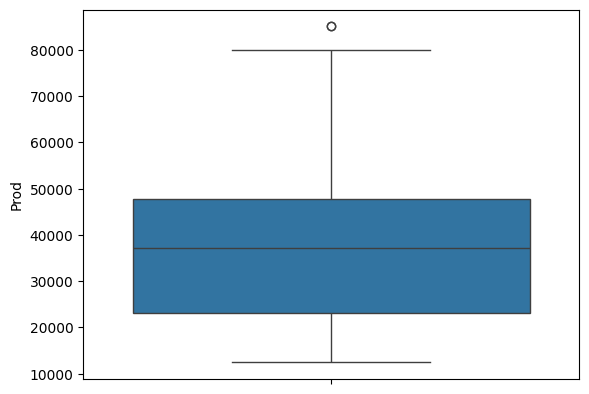

In [60]:
sns.boxplot(complete_df['Prod'])

In [61]:
complete_outlier(complete_df, 'Prod')

<ipython-input-57-c8fad593cc35>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].mask((df[col] > upper) | (df[col] < lower), np.nan)
<ipython-input-56-89531c1ca233>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(mean_value, inplace=True)


### Outlier HarvArea

<Axes: ylabel='HarvArea'>

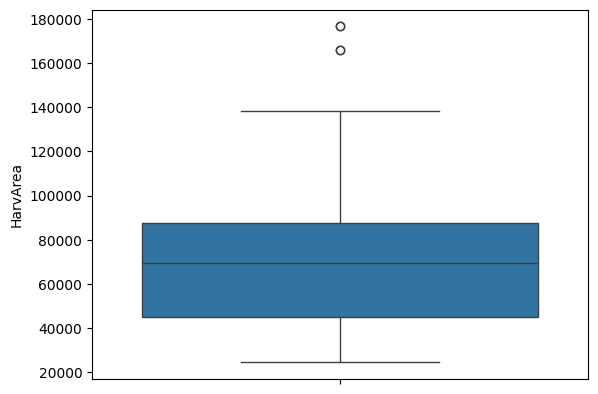

In [62]:
sns.boxplot(complete_df['HarvArea'])

In [63]:
complete_outlier(complete_df, 'HarvArea')

<ipython-input-57-c8fad593cc35>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].mask((df[col] > upper) | (df[col] < lower), np.nan)
<ipython-input-56-89531c1ca233>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(mean_value, inplace=True)


### Outlier AvgRain

<Axes: ylabel='AvgRain'>

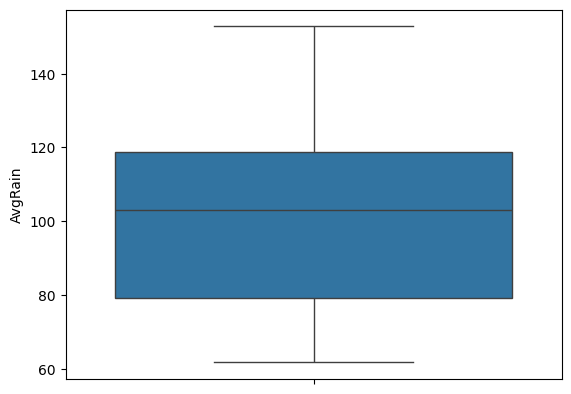

In [64]:
sns.boxplot(complete_df['AvgRain'])

In [65]:
complete_outlier(complete_df, 'AvgRain')

<ipython-input-57-c8fad593cc35>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].mask((df[col] > upper) | (df[col] < lower), np.nan)
<ipython-input-56-89531c1ca233>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(mean_value, inplace=True)


# หาความสัมพันธ์ของข้อมูลระหว่าง Features

In [66]:
complete_df.corr()

,Prod,HarvArea,AvgRain
Prod,1.000000,0.886743,0.002251
HarvArea,0.886743,1.000000,0.020205
AvgRain,0.002251,0.020205,1.000000


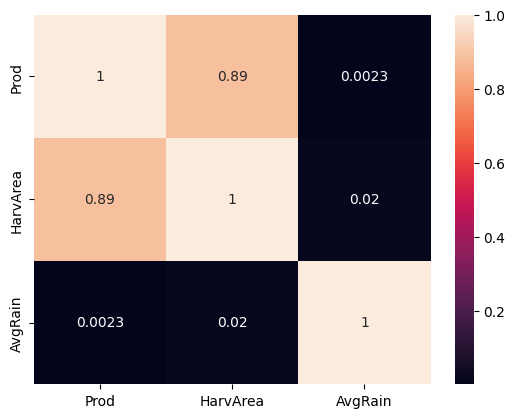

In [67]:
sns.heatmap(complete_df.corr(), annot=True)
plt.show()

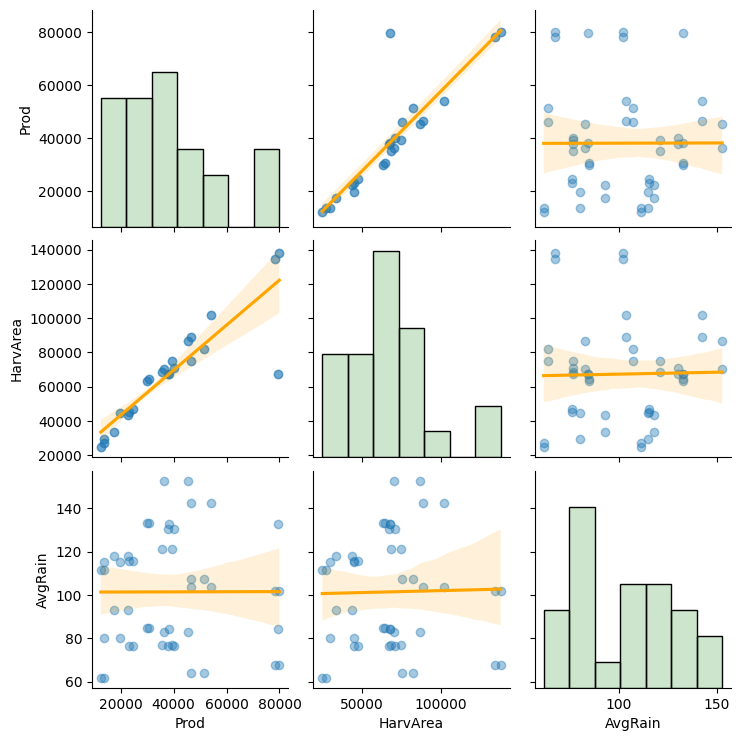

In [68]:
sns.pairplot(complete_df,
             kind='reg',
             plot_kws={'scatter_kws': {'alpha': .4},
                       'line_kws': {'color': 'orange'}},
             diag_kws={'color': 'green', 'alpha':.2});

# แบ่งชุดข้อมูลออกเป็นชุดฝึกอบรมและชุดทดสอบ (Split data into training and testing sets)

In [69]:
X = complete_df[['HarvArea','AvgRain']]  # Features
y = complete_df['Prod'] # target

In [70]:
X

,HarvArea,AvgRain
8,138243.000000,101.997283
9,138243.000000,67.718160
10,134362.000000,101.997283
11,134362.000000,67.718160
12,67364.454545,132.848725
13,67364.454545,84.242168
14,67364.454545,132.848725
15,67364.454545,84.242168
32,82019.000000,107.238492
33,82019.000000,64.072260


In [71]:
y

8      79951.000000
9      79951.000000
10     78367.000000
11     78367.000000
12     79618.000000
13     79618.000000
14     38211.130435
15     38211.130435
32     51299.000000
33     51299.000000
34     46364.000000
35     46364.000000
40     46557.000000
41     46557.000000
42     53943.000000
43     53943.000000
44     37832.000000
45     37832.000000
46     40022.000000
47     40022.000000
48     36385.000000
49     36385.000000
50     45456.000000
51     45456.000000
52     35426.000000
53     35426.000000
54     39534.000000
55     39534.000000
56     29930.000000
57     29930.000000
58     30723.000000
59     30723.000000
64     23252.000000
65     23252.000000
66     24629.000000
67     24629.000000
68     22614.000000
69     22614.000000
70     17414.000000
71     17414.000000
84     19839.000000
85     19839.000000
86     13601.000000
87     13601.000000
100    12451.000000
101    12451.000000
102    13649.000000
103    13649.000000
Name: Prod, dtype: float64

In [72]:
# แบ่งชุดข้อมูลฝึกสอน 80% และ ชุดข้อมูลทดสอบ 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# สร้างโมเดลจำลอง

## K-Nearest Neighbors Regression (KNN-R)

In [73]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing

### ทำ Normalization ข้อมูล (Normalization Data)

In [74]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [75]:
X_train_scaled

array([[1.        , 0.42741491],
       [1.        , 0.04108928],
       [0.95906982, 0.42741491],
       [0.95906982, 0.04108928],
       [0.25249372, 0.77511057],
       [0.25249372, 0.2273148 ],
       [0.25249372, 0.77511057],
       [0.25249372, 0.2273148 ],
       [0.40704493, 0.48648331],
       [0.40704493, 0.        ],
       [0.33361105, 0.48648331],
       [0.33361105, 0.        ],
       [0.47970892, 0.8855768 ],
       [0.47970892, 0.44750139],
       [0.61844548, 0.8855768 ],
       [0.61844548, 0.44750139],
       [0.25074879, 0.74687703],
       [0.25074879, 0.1391253 ],
       [0.29194263, 0.74687703],
       [0.29194263, 0.1391253 ],
       [0.28425438, 1.        ],
       [0.28425438, 0.20961247],
       [0.45852141, 1.        ],
       [0.45852141, 0.20961247],
       [0.26571398, 0.64378881],
       [0.26571398, 0.14341602],
       [0.3328939 , 0.64378881],
       [0.3328939 , 0.14341602],
       [0.20902763, 0.77701091],
       [0.20902763, 0.23364575],
       [0.

In [76]:
X_test_scaled

array([[-0.10370175,  0.60798281],
       [-0.10370175,  0.32545981],
       [ 0.0109787 ,  0.57401717],
       [ 0.0109787 ,  0.18043689],
       [-0.14893482,  0.57401717],
       [-0.14893482,  0.18043689],
       [-0.19936722,  0.53423079],
       [-0.19936722, -0.02666894],
       [-0.17194685,  0.53423079],
       [-0.17194685, -0.02666894]])

### สร้างโมเดล

In [77]:
knnr = KNeighborsRegressor(n_neighbors = 8, metric='euclidean')
knnr.fit(X_train, y_train)

KNeighborsRegressor(metric='euclidean', n_neighbors=8)

Text(0.5, 1.0, 'ELBOW PLOT')

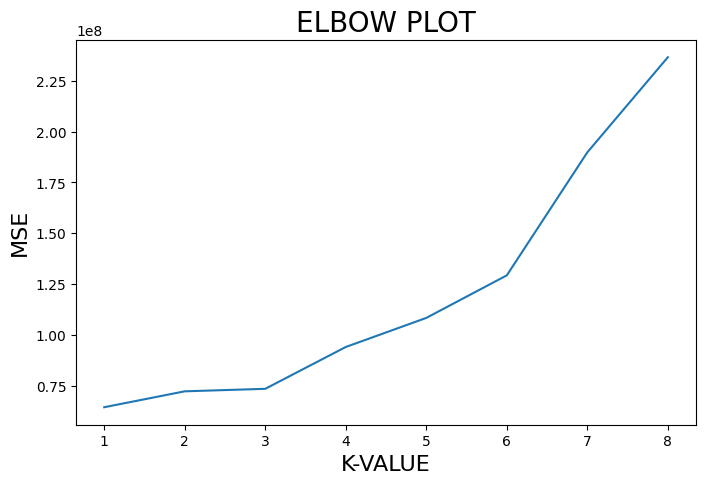

In [78]:
from sklearn.metrics import mean_squared_error

fig, ax = plt.subplots(figsize=(8,5))
k_list = np.arange(1, 9, 1)
knn_dict = {} # To store k and mae pairs
for i in k_list:
#Knn Model Creation
    knn = KNeighborsRegressor(n_neighbors=int(i))
    model_knn = knn.fit(X_train_scaled, y_train)
    y_knn_pred = model_knn.predict(X_test_scaled)
#Storing MSE
    mse = mean_squared_error(y_test, y_knn_pred)
    knn_dict[i] = mse
#Plotting the results
ax.plot(knn_dict.keys(),knn_dict.values())
ax.set_xlabel('K-VALUE', fontsize=16)
ax.set_ylabel('MSE' ,fontsize=16)
ax.set_title('ELBOW PLOT' ,fontsize=20)

### การพยากรณ์

**ชุดข้อมูลฝึกฝน**

In [79]:
y_pred_train = knnr.predict(X_train)
y_pred_train

array([64704.5       , 64704.5       , 64704.5       , 64704.5       ,
       47771.7826087 , 47771.7826087 , 47771.7826087 , 47771.7826087 ,
       47419.        , 47419.        , 40576.25      , 40576.25      ,
       49313.75      , 49313.75      , 49313.75      , 49313.75      ,
       47771.7826087 , 47771.7826087 , 42686.89130435, 42686.89130435,
       42686.89130435, 42686.89130435, 47419.        , 47419.        ,
       47771.7826087 , 47771.7826087 , 40576.25      , 40576.25      ,
       39349.89130435, 39349.89130435, 39349.89130435, 39349.89130435,
       25106.25      , 25106.25      , 25106.25      , 25106.25      ,
       25106.25      , 25106.25      ])

**ชุดข้อมูลทดสอบ**

In [80]:
y_pred_test = knnr.predict(X_test)
y_pred_test

array([25106.25, 25106.25, 25106.25, 25106.25, 25106.25, 25106.25,
       25106.25, 25106.25, 25106.25, 25106.25])

In [81]:
y_pred = knnr.predict(X)
y_pred

array([64704.5       , 64704.5       , 64704.5       , 64704.5       ,
       47771.7826087 , 47771.7826087 , 47771.7826087 , 47771.7826087 ,
       47419.        , 47419.        , 40576.25      , 40576.25      ,
       49313.75      , 49313.75      , 49313.75      , 49313.75      ,
       47771.7826087 , 47771.7826087 , 42686.89130435, 42686.89130435,
       42686.89130435, 42686.89130435, 47419.        , 47419.        ,
       47771.7826087 , 47771.7826087 , 40576.25      , 40576.25      ,
       39349.89130435, 39349.89130435, 39349.89130435, 39349.89130435,
       25106.25      , 25106.25      , 25106.25      , 25106.25      ,
       25106.25      , 25106.25      , 25106.25      , 25106.25      ,
       25106.25      , 25106.25      , 25106.25      , 25106.25      ,
       25106.25      , 25106.25      , 25106.25      , 25106.25      ])

**ชุดข้อมูล X**

In [82]:
complete_df['Predicted_Prod'] = knnr.predict(X)
complete_df

<ipython-input-82-a4dcf3a8ac5c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_df['Predicted_Prod'] = knnr.predict(X)


,Prod,HarvArea,AvgRain,Predicted_Prod
8,79951.000000,138243.000000,101.997283,64704.500000
9,79951.000000,138243.000000,67.718160,64704.500000
10,78367.000000,134362.000000,101.997283,64704.500000
11,78367.000000,134362.000000,67.718160,64704.500000
12,79618.000000,67364.454545,132.848725,47771.782609
13,79618.000000,67364.454545,84.242168,47771.782609
14,38211.130435,67364.454545,132.848725,47771.782609
15,38211.130435,67364.454545,84.242168,47771.782609
32,51299.000000,82019.000000,107.238492,47419.000000
33,51299.000000,82019.000000,64.072260,47419.000000


In [83]:
absolute_dis_list = abs(y_pred - complete_df['Prod'])
result_df_knnr = pd.DataFrame({'y_pred': y_pred, 'complete_df_prod': complete_df['Prod'], 'absolute_difference': absolute_dis_list})

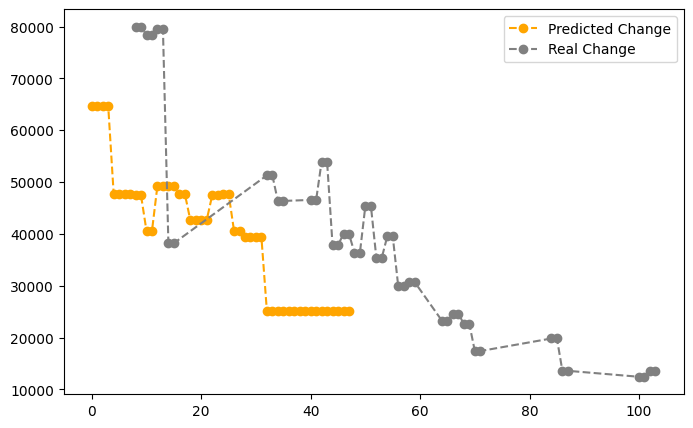

In [84]:
plt.figure(figsize = (8, 5))
plt.plot(y_pred, label = 'Predicted Change',
         linestyle="--", marker='o', color='orange') # การเปลี่ยนแปลงที่คาดการณ์ไว้
plt.plot(complete_df['Prod'], label = 'Real Change',
         linestyle="--", marker='o', color='grey') # การเปลี่ยนแปลงที่แท้จริง
plt.legend()

### การประเมินผลโมเดล

In [85]:
from sklearn.metrics import mean_squared_error, r2_score
import math

# Evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    print(f"Model: {model_name}")
    print(f"R-squared: {round(r2,2)}")
    print(f"Mean Square Error: {round(mse,2)}")
    print(f"Root Mean Square Error: {round(rmse,2)}")
    print("")
    toRe = {
      'modelName' : model_name,
      'r2' : r2,
      'mse' : mse,
      'rmse' : rmse,
    }
    return toRe

**ชุดข้อมูลฝึกฝน**

In [86]:
KNNR_report = evaluate_model(y_train, y_pred_train, 'K-Nearest Neighbors Regression')

Model: K-Nearest Neighbors Regression
R-squared: 0.64
Mean Square Error: 109384055.98
Root Mean Square Error: 10458.68



Text(0, 0.5, 'Actual')

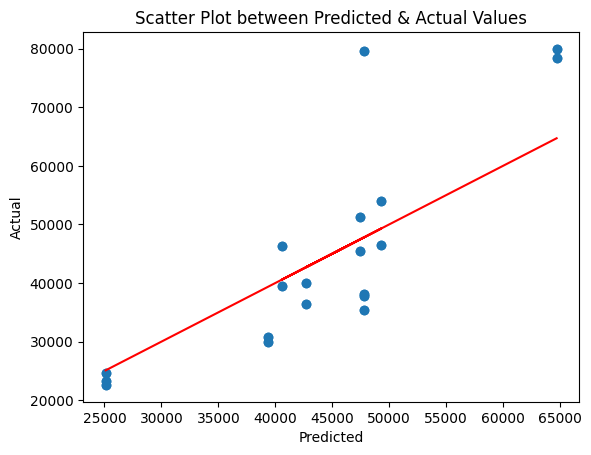

In [87]:
plt.scatter(y_pred_train, y_train)

plt.plot(y_pred_train, y_pred_train, color='red')

plt.title('Scatter Plot between Predicted & Actual Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')

**ชุดข้อมูลทดสอบ**

In [88]:
evaluate_model(y_test, y_pred_test, 'K-Nearest Neighbors Regression')

Model: K-Nearest Neighbors Regression
R-squared: -12.18
Mean Square Error: 102141868.06
Root Mean Square Error: 10106.53



{'modelName': 'K-Nearest Neighbors Regression',
 'r2': -12.176366632099828,
 'mse': 102141868.0625,
 'rmse': 10106.52601354689}

Text(0, 0.5, 'Actual')

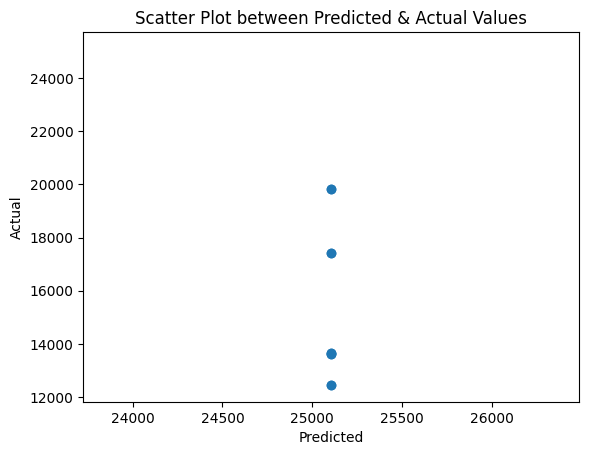

In [89]:
plt.scatter(y_pred_test, y_test)

plt.plot(y_pred_test, y_pred_test, color='red')

plt.title('Scatter Plot between Predicted & Actual Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')

## Multiple Linear Regression (MLR)

### สร้างโมเดล

In [90]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [91]:
# ค่าจุดตัดแกน Y ของสมการ
reg.intercept_

2449.4014400654196

In [92]:
# ค่าสัมประสิทธิ์การถดถอยของตัวตอบสนอง X
reg.coef_

array([  0.57155465, -20.21065866])

### การพยากรณ์

**ชุดข้อมูลฝึกฝน**

In [93]:
y_pred_train = reg.predict(X_train)
y_pred_train

array([79401.39887951, 80094.20253779, 77183.19527621, 77875.99893449,
       38266.9085703 , 39249.27909662, 38266.9085703 , 39249.27909662,
       47160.38186735, 48032.79983633, 43180.64682747, 44053.06479645,
       50382.69296551, 51168.30030348, 57901.4944088 , 58687.10174677,
       38222.97389437, 39312.8643649 , 40455.46636396, 41545.3568345 ,
       39584.87372151, 41002.28778432, 49029.24278643, 50446.65684923,
       39218.87963024, 40116.20579872, 42859.68276166, 43757.00893013,
       35907.86414662, 36882.28919881, 36586.87107286, 37561.29612505,
       25859.35821501, 26648.82701441, 27006.468401  , 27795.93720039,
       24882.77162315, 25389.42443831])

**ชุดข้อมูลทดสอบ**

In [94]:
y_pred_test = reg.predict(X_test)
y_pred_test

array([19262.67473285, 19769.32754801, 25538.67111989, 26244.48464781,
       16872.18793596, 17578.00146387, 14210.36310706, 15216.23318567,
       15696.40520151, 16702.27528012])

**ชุดข้อมูล X**

In [95]:
y_pred = reg.predict(X)
y_pred

array([79401.39887951, 80094.20253779, 77183.19527621, 77875.99893449,
       38266.9085703 , 39249.27909662, 38266.9085703 , 39249.27909662,
       47160.38186735, 48032.79983633, 43180.64682747, 44053.06479645,
       50382.69296551, 51168.30030348, 57901.4944088 , 58687.10174677,
       38222.97389437, 39312.8643649 , 40455.46636396, 41545.3568345 ,
       39584.87372151, 41002.28778432, 49029.24278643, 50446.65684923,
       39218.87963024, 40116.20579872, 42859.68276166, 43757.00893013,
       35907.86414662, 36882.28919881, 36586.87107286, 37561.29612505,
       25859.35821501, 26648.82701441, 27006.468401  , 27795.93720039,
       24882.77162315, 25389.42443831, 19262.67473285, 19769.32754801,
       25538.67111989, 26244.48464781, 16872.18793596, 17578.00146387,
       14210.36310706, 15216.23318567, 15696.40520151, 16702.27528012])

In [96]:
absolute_dis_list = abs(y_pred - complete_df['Prod'])
result_df_mlr = pd.DataFrame({'y_pred': y_pred, 'complete_df_prod': complete_df['Prod'], 'absolute_difference': absolute_dis_list})

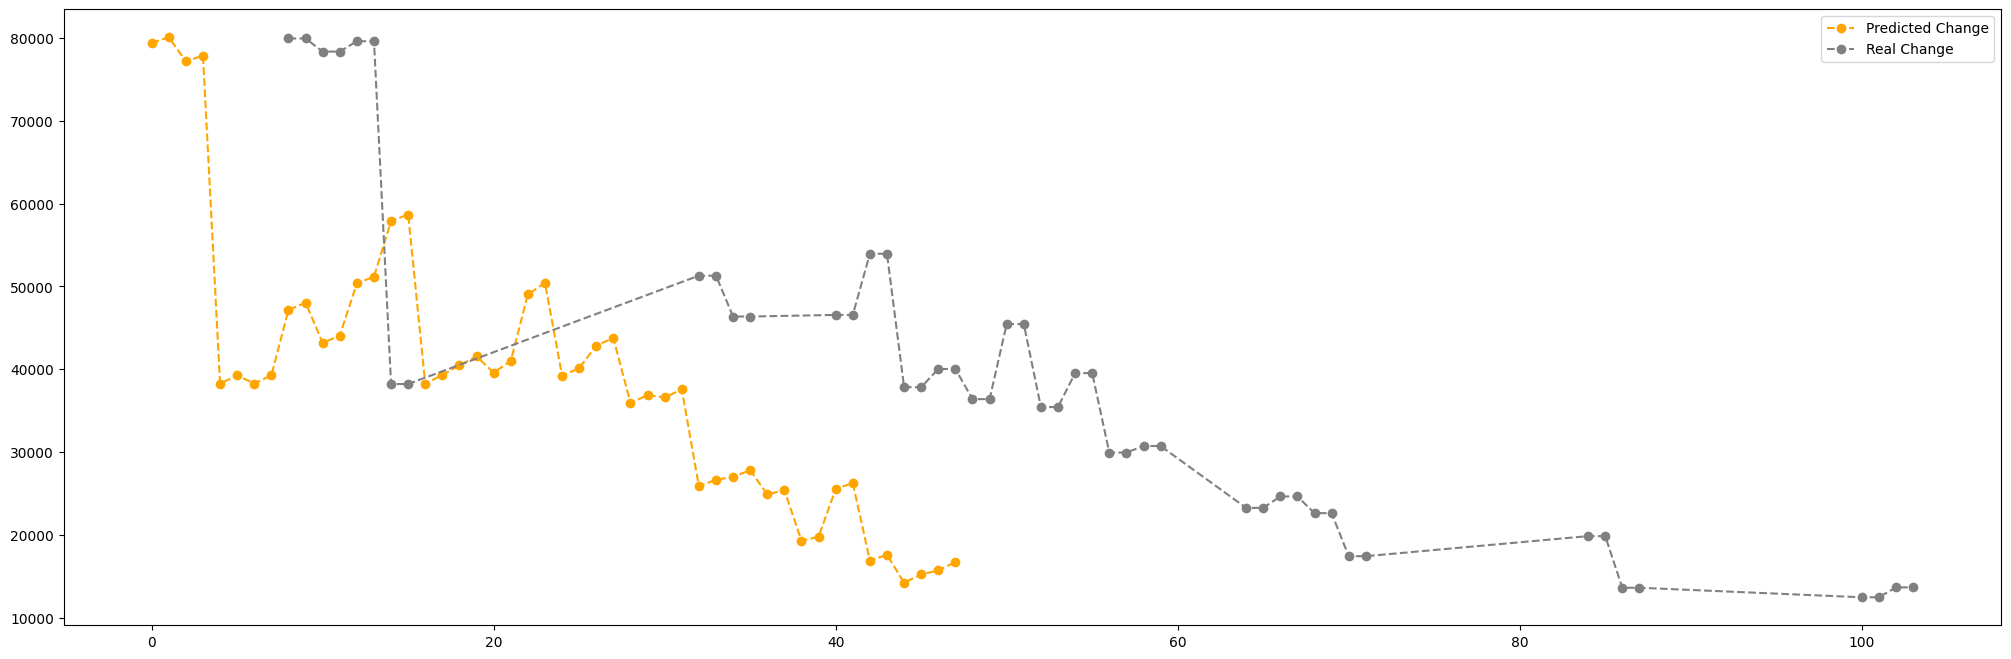

In [97]:
plt.figure(figsize = (25, 8))
plt.plot(y_pred, label = 'Predicted Change', linestyle="--", marker='o', color='orange') # การเปลี่ยนแปลงที่คาดการณ์ไว้
plt.plot(complete_df['Prod'], label = 'Real Change', linestyle="--", marker='o', color='grey') # การเปลี่ยนแปลงที่แท้จริง
plt.legend()

### การประเมินผลโมเดล

**ชุดข้อมูลฝึกฝน**

In [98]:
MLR_report = evaluate_model(y_train, y_pred_train, 'Multiple Linear Regression')

Model: Multiple Linear Regression
R-squared: 0.67
Mean Square Error: 100299730.7
Root Mean Square Error: 10014.98



Text(0, 0.5, 'Actual')

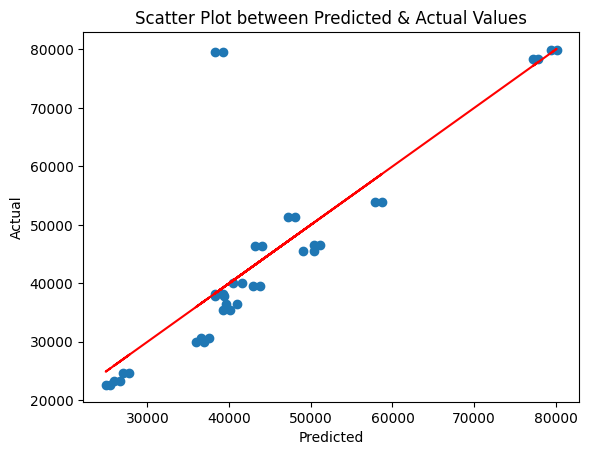

In [99]:
plt.scatter(y_pred_train, y_train)

plt.plot(y_pred_train, y_pred_train, color='red')

plt.title('Scatter Plot between Predicted & Actual Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')

**ชุดข้อมูลทดสอบ**

In [100]:
evaluate_model(y_test, y_pred_test, 'Multiple Linear Regression')

Model: Multiple Linear Regression
R-squared: -0.72
Mean Square Error: 13325509.28
Root Mean Square Error: 3650.41



{'modelName': 'Multiple Linear Regression',
 'r2': -0.7189992626467694,
 'mse': 13325509.283951962,
 'rmse': 3650.4122074023317}

Text(0, 0.5, 'Actual')

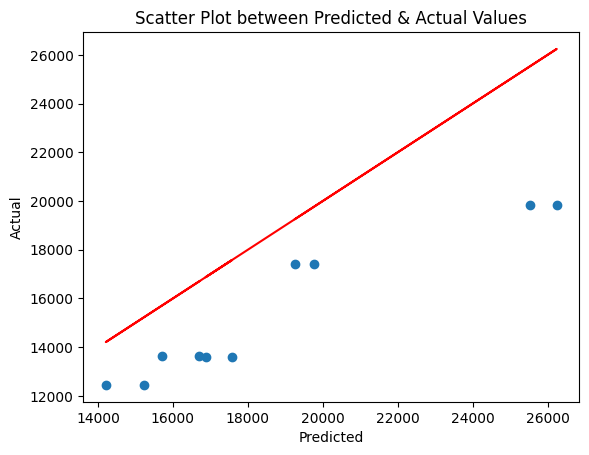

In [101]:
plt.scatter(y_pred_test, y_test)

plt.plot(y_pred_test, y_pred_test, color='red')

plt.title('Scatter Plot between Predicted & Actual Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# บทสรุปและการเปรียบเทียบ

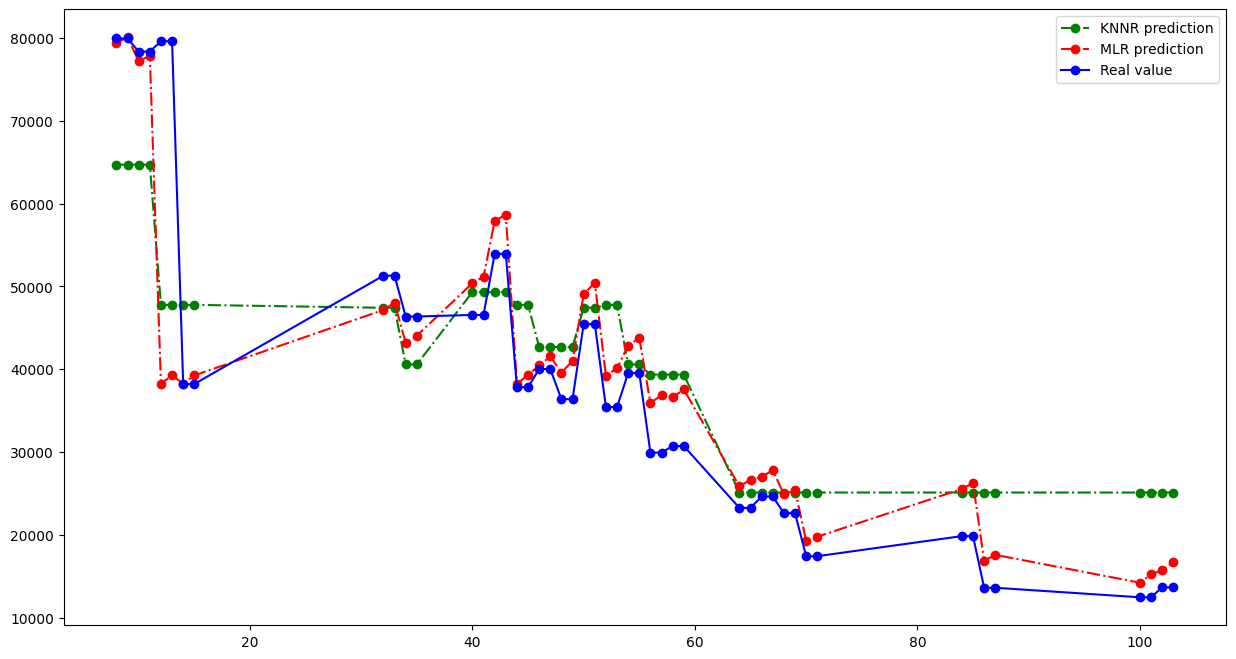

In [112]:
plt.figure(figsize = (15, 8))
plt.plot(result_df_knnr['y_pred'], label = 'KNNR prediction', linestyle="-.",marker='o', color='green') # การเปลี่ยนแปลงที่คาดการณ์ไว้ KNNR
plt.plot(result_df_mlr['y_pred'], label = 'MLR prediction', linestyle="-.",marker='o', color='red') # การเปลี่ยนแปลงที่คาดการณ์ไว้ MLR
plt.plot(complete_df['Prod'], label = 'Real value', linestyle="-", marker='o', color='blue') # การเปลี่ยนแปลงที่แท้จริง
plt.legend()

In [104]:
def print_rep(report) :
  print('Model :', report['modelName'])
  print('R2 :', round(report['r2'], 2))
  print('MSE :', round(report['mse'], 2))
  print('RMSE :', round(report['rmse'], 2))

print_rep(KNNR_report)
print('--------------------------------------')
print_rep(MLR_report)

Model : K-Nearest Neighbors Regression
R2 : 0.64
MSE : 109384055.98
RMSE : 10458.68
--------------------------------------
Model : Multiple Linear Regression
R2 : 0.67
MSE : 100299730.7
RMSE : 10014.98
